<a href="https://colab.research.google.com/github/ivanrango/Machine-Learning/blob/master/Trabajo_Pr%C3%A1ctico_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Salarios NBA

El objetivo de este trabajo es predecir cuales serán los salarios de los jugadores de la NBA a partir de sus estadísticas de juego. Se tienen en cuenta jugadores desde 1985 hasta 2018.

Se disponen de dos datasets, uno con información sobre las estadísiticas de los jugadores y otro con información sobre sus salarios.

### Nota sobre las estadísticas:

career_AST = 	Career assists per game

career_FG% =	Career field goal percentage

career_FG3%	= Career 3-point field goal percentage

career_FT% =	Career free throw percentage

career_G =	Career games played

career_PER =	Career player efficency rating

career_PTS = Career points per game

career_TRB = Career total rebounds per game

career_WS = Career win shares

career_eFG% = Career effecive field goal percentage


In [13]:
import pandas as pd
url='https://raw.githubusercontent.com/manlio99/Materia-de-aprendizaje/master/3_MidtermProjects/ProjectNBA/data/players.csv'
stats=pd.read_csv(url)
stats.head(10)

,_id,birthDate,birthPlace,career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PER,career_PTS,career_TRB,career_WS,career_eFG%,college,draft_pick,draft_round,draft_team,draft_year,height,highSchool,name,position,shoots,weight
0,abdelal01,"June 24, 1968","Cairo, Egypt",0.3,50.2,0.0,70.1,256,13.0,5.7,3.3,4.8,50.2,Duke University,25th overall,1st round,Portland Trail Blazers,1990,6-10,"Bloomfield in Bloomfield, New Jersey",Alaa Abdelnaby,Power Forward,Right,240lb
1,abdulza01,"April 7, 1946","Brooklyn, New York",1.2,42.8,NaN,72.8,505,15.1,9.0,8.0,17.5,NaN,Iowa State University,5th overall,1st round,Cincinnati Royals,1968,6-9,"John Jay in Brooklyn, New York",Zaid Abdul-Aziz,Power Forward and Center,Right,235lb
2,abdulka01,"April 16, 1947","New York, New York",3.6,55.9,5.6,72.1,1560,24.6,24.6,11.2,273.4,55.9,"University of California, Los Angeles",1st overall,1st round,Milwaukee Bucks,1969,7-2,"Power Memorial in New York, New York",Kareem Abdul-Jabbar,Center,Right,225lb
3,abdulma02,"March 9, 1969","Gulfport, Mississippi",3.5,44.2,35.4,90.5,586,15.4,14.6,1.9,25.2,47.2,Louisiana State University,3rd overall,1st round,Denver Nuggets,1990,6-1,"Gulfport in Gulfport, Mississippi",Mahmoud Abdul-Rauf,Point Guard,Right,162lb
4,abdulta01,"November 3, 1974","Maisons Alfort, France",1.1,41.7,23.7,70.3,236,11.4,7.8,3.3,3.5,42.2,"University of Michigan, San Jose State University",11th overall,1st round,Sacramento Kings,1997,6-6,"Lycee Aristide Briand in Evreux, France",Tariq Abdul-Wahad,Shooting Guard,Right,223lb
5,abdursh01,"December 11, 1976","Marietta, Georgia",2.5,47.2,29.7,81.0,830,19.0,18.1,7.5,71.2,47.9,University of California,3rd overall,1st round,Vancouver Grizzlies,1996,6-9,"Wheeler in Marietta, Georgia",Shareef Abdur-Rahim,Center and Small Forward and Power Forward,Right,225lb
6,abernto01,"May 6, 1954","South Bend, Indiana",1.2,49.2,0.0,74.7,319,12.9,5.6,3.2,13.4,49.2,Indiana University,43rd overall,3rd round,Los Angeles Lakers,1976,6-7,"Saint Joseph in South Bend, Indiana",Tom Abernethy,Small Forward and Power Forward,Right,220lb
7,ablefo01,"July 27, 1932",NaN,1.0,0.0,NaN,-,1,-41.1,0.0,1.0,0.0,NaN,Western Kentucky University,NaN,1956 NBA Draf,Syracuse Nationals,NaN,6-3,"Fairdale in Louisville, Kentucky",Forest Able,Guard,Right,180lb
8,abramjo01,"February 9, 1919","Etna, Pennsylvania",0.7,23.7,NaN,68.6,56,-,9.5,-,-1.9,NaN,Salem International University,NaN,NaN,NaN,NaN,6-3,"Etna in Etna, Pennsylvania",John Abramovic,Forward,Right,195lb
9,abrinal01,"August 1, 1993","Palma de Mallorca, Spain",0.5,38.7,36.8,88.0,174,8.8,5.3,1.4,5.0,52.5,NaN,32nd overall,2nd round,Oklahoma City Thunder,2013,6-6,NaN,Alex Abrines,Shooting Guard,Right,200lb


In [14]:
import pandas as pd
url='https://raw.githubusercontent.com/manlio99/Materia-de-aprendizaje/master/3_MidtermProjects/ProjectNBA/data/salaries_1985to2018.csv'
salary=pd.read_csv(url)
salary.head(10)

,league,player_id,salary,season,season_end,season_start,team
0,NBA,abdelal01,395000,1990-91,1991,1990,Portland Trail Blazers
1,NBA,abdelal01,494000,1991-92,1992,1991,Portland Trail Blazers
2,NBA,abdelal01,500000,1992-93,1993,1992,Boston Celtics
3,NBA,abdelal01,805000,1993-94,1994,1993,Boston Celtics
4,NBA,abdelal01,650000,1994-95,1995,1994,Sacramento Kings
5,NBA,abdulka01,1530000,1984-85,1985,1984,Los Angeles Lakers
6,NBA,abdulka01,2030000,1985-86,1986,1985,Los Angeles Lakers
7,NBA,abdulka01,2000000,1987-88,1988,1987,Los Angeles Lakers
8,NBA,abdulka01,3000000,1988-89,1989,1988,Los Angeles Lakers
9,NBA,abdulma02,1660000,1990-91,1991,1990,Denver Nuggets


Se ajustan los salarios de acuerdo a la inflacón del dólar estadounidense. El ajuste se realiza en base del índice de precios al consumidor de Estados Unidos.

In [15]:
pip install cpi

In [16]:
import cpi
cpi.update()
salary['adjusted_salary'] = salary.apply(lambda x: cpi.inflate(x.salary, x.season_start), axis=1)

Con el objetivo de seleccionar los atributos que mejor representen a los jugadores, se observa cuáles de éstos son los que contienen mayor cantidad de datos faltantes y se los deja de lado.

En este caso, se deja de lado: 

draft_year, draft_pick, draft_team, draft_round, career_eFG%, career_FG3%

porque se considera que la cantidad de valores que faltan corresponden a un porcentaje importante respecto de la cantidad de datos totales.

Luego, los siguientes atributos:

highSchool, birthPlace, college, birthDate, weight, shoots, position

se dejan de lado, ya que se consideran no significativos para realizar el ajuste.

In [17]:
null_values_col = stats.isnull().sum()
null_values_col = null_values_col[null_values_col != 0].sort_values(ascending = False).reset_index()
null_values_col.columns = ["variable", "number of missing"]
null_values_col.head(15)

,variable,number of missing
0,draft_year,1379
1,draft_pick,1316
2,draft_team,1178
3,draft_round,1178
4,career_eFG%,1128
5,career_FG3%,1128
6,highSchool,660
7,birthPlace,500
8,college,313
9,birthDate,28


In [18]:
stats = stats.drop(['draft_year', 'draft_pick', 'draft_team', 'draft_round', 'career_eFG%', 'career_FG3%', 'highSchool', 'birthPlace', 'college', 'birthDate', 'weight', 'shoots', 'position'], axis=1)


De los atributos que quedan para el análisis, varios contienen datos vacíos. Es necesario deshacerse de estos valores antes de realizar la regresión.

In [19]:
stats.dropna()

,_id,career_AST,career_FG%,career_FT%,career_G,career_PER,career_PTS,career_TRB,career_WS,height,name
0,abdelal01,0.3,50.2,70.1,256,13.0,5.7,3.3,4.8,6-10,Alaa Abdelnaby
1,abdulza01,1.2,42.8,72.8,505,15.1,9.0,8.0,17.5,6-9,Zaid Abdul-Aziz
2,abdulka01,3.6,55.9,72.1,1560,24.6,24.6,11.2,273.4,7-2,Kareem Abdul-Jabbar
3,abdulma02,3.5,44.2,90.5,586,15.4,14.6,1.9,25.2,6-1,Mahmoud Abdul-Rauf
4,abdulta01,1.1,41.7,70.3,236,11.4,7.8,3.3,3.5,6-6,Tariq Abdul-Wahad
...,...,...,...,...,...,...,...,...,...,...,...
4680,zizican01,0.6,58.3,70.8,91,17.5,6.4,4.2,3.0,6-11,Ante Zizic
4681,zoetji01,0.1,20.0,-,7,-0.8,0.3,1.1,-0.1,7-1,Jim Zoet
4682,zopfbi01,1.4,36.3,55.6,53,9.6,2.2,0.9,-0.1,6-1,Bill Zopf
4683,zubaciv01,0.8,54.0,76.1,140,17.6,6.9,4.6,5.3,7-1,Ivica Zubac


In [20]:
import numpy as np

stats['height'] = stats['height'].str.replace('-','.').astype(np.float64)
#all['career_G'] = pd.to_numeric(all['career_G'])
#print (all[pd.to_numeric(all['career_FG%'], errors='coerce').isnull()])


for i in stats.index:
  if stats['career_FG%'][i] == '-':
    stats.drop(i,axis=0,inplace=True)

stats['career_FG%'] = pd.to_numeric(stats['career_FG%'])

for i in stats.index:
  if stats['career_FT%'][i] == '-':
    stats.drop(i,axis=0,inplace=True)

stats['career_FT%'] = pd.to_numeric(stats['career_FT%'])

for i in stats.index:
  if stats['career_G'][i] == '-':
    stats.drop(i,axis=0,inplace=True)

stats['career_G'] = pd.to_numeric(stats['career_G'])

for i in stats.index:
  if stats['career_PER'][i] == '-':
    stats.drop(i,axis=0,inplace=True)

stats['career_PER'] = pd.to_numeric(stats['career_PER'])

for i in stats.index:
  if stats['career_TRB'][i] == '-':
    stats.drop(i,axis=0,inplace=True)

stats['career_TRB'] = pd.to_numeric(stats['career_TRB'])

for i in stats.index:
  if stats['career_WS'][i] == '-':
    stats.drop(i,axis=0,inplace=True)

stats['career_WS'] = pd.to_numeric(stats['career_WS'])

Una vez que el dataset de las estadísticas se encuentra limpio y ordenado, se lo compara con el de los salarios, identificando los valores coincidentes de los atributos _id (stats) y player_id (salary) de manera de tener un único dato de salario asociado a cada jugador. 
Además se crea una nueva variable de salario que tiene en cuenta el salario promedio de acuerdo a la cantidad de temporadas que jugó cada jugador en la liga y se agreaga esta variable al dataset de las estadísticas.


Nota: Gracias **Agustin Copita** por la ayuda en este punto.


In [21]:
stats['average_salary'] = 0
stats['seasons_played'] = 0

for i in stats.index:
  for j in salary.index:
    if (stats['_id'][i] == salary['player_id'][j]):
      stats['average_salary'][i]+=salary['adjusted_salary'][j]
      stats['seasons_played'][i]+=1
  
stats['average_salary']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0        5064800
1              0
2       19223935
3       33583357
4       52658880
          ...   
4678      993936
4679     2129357
4680     1685383
4682           0
4683     2427492
Name: average_salary, Length: 4148, dtype: int64

Nuevamente, se eliminan las celdas vacías.


In [22]:
stats['average_season_salary (millions)'] = (stats['average_salary']/stats['seasons_played'])/1000000
for i in stats.index:
  if stats['average_salary'][i] == 0:
    stats.drop(i,axis=0,inplace=True)
stats

,_id,career_AST,career_FG%,career_FT%,career_G,career_PER,career_PTS,career_TRB,career_WS,height,name,average_salary,seasons_played,average_season_salary (millions)
0,abdelal01,0.3,50.2,70.1,256,13.0,5.7,3.3,4.8,6.10,Alaa Abdelnaby,5064800,5,1.012960
2,abdulka01,3.6,55.9,72.1,1560,24.6,24.6,11.2,273.4,7.20,Kareem Abdul-Jabbar,19223935,4,4.805984
3,abdulma02,3.5,44.2,90.5,586,15.4,14.6,1.9,25.2,6.10,Mahmoud Abdul-Rauf,33583357,9,3.731484
4,abdulta01,1.1,41.7,70.3,236,11.4,7.8,3.3,3.5,6.60,Tariq Abdul-Wahad,52658880,10,5.265888
5,abdursh01,2.5,47.2,81.0,830,19.0,18.1,7.5,71.2,6.90,Shareef Abdur-Rahim,130828879,11,11.893534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4676,zidekge01,0.2,40.8,78.3,135,8.7,3.4,2.1,0.8,7.00,George Zidek,3331153,3,1.110384
4678,zimmest01,0.2,32.3,60.0,19,7.3,1.2,1.8,0.0,7.00,Stephen Zimmerman,993936,1,0.993936
4679,zipsepa01,0.8,37.1,76.9,98,6.1,4.7,2.6,0.0,6.80,Paul Zipser,2129357,2,1.064679
4680,zizican01,0.6,58.3,70.8,91,17.5,6.4,4.2,3.0,6.11,Ante Zizic,1685383,1,1.685383


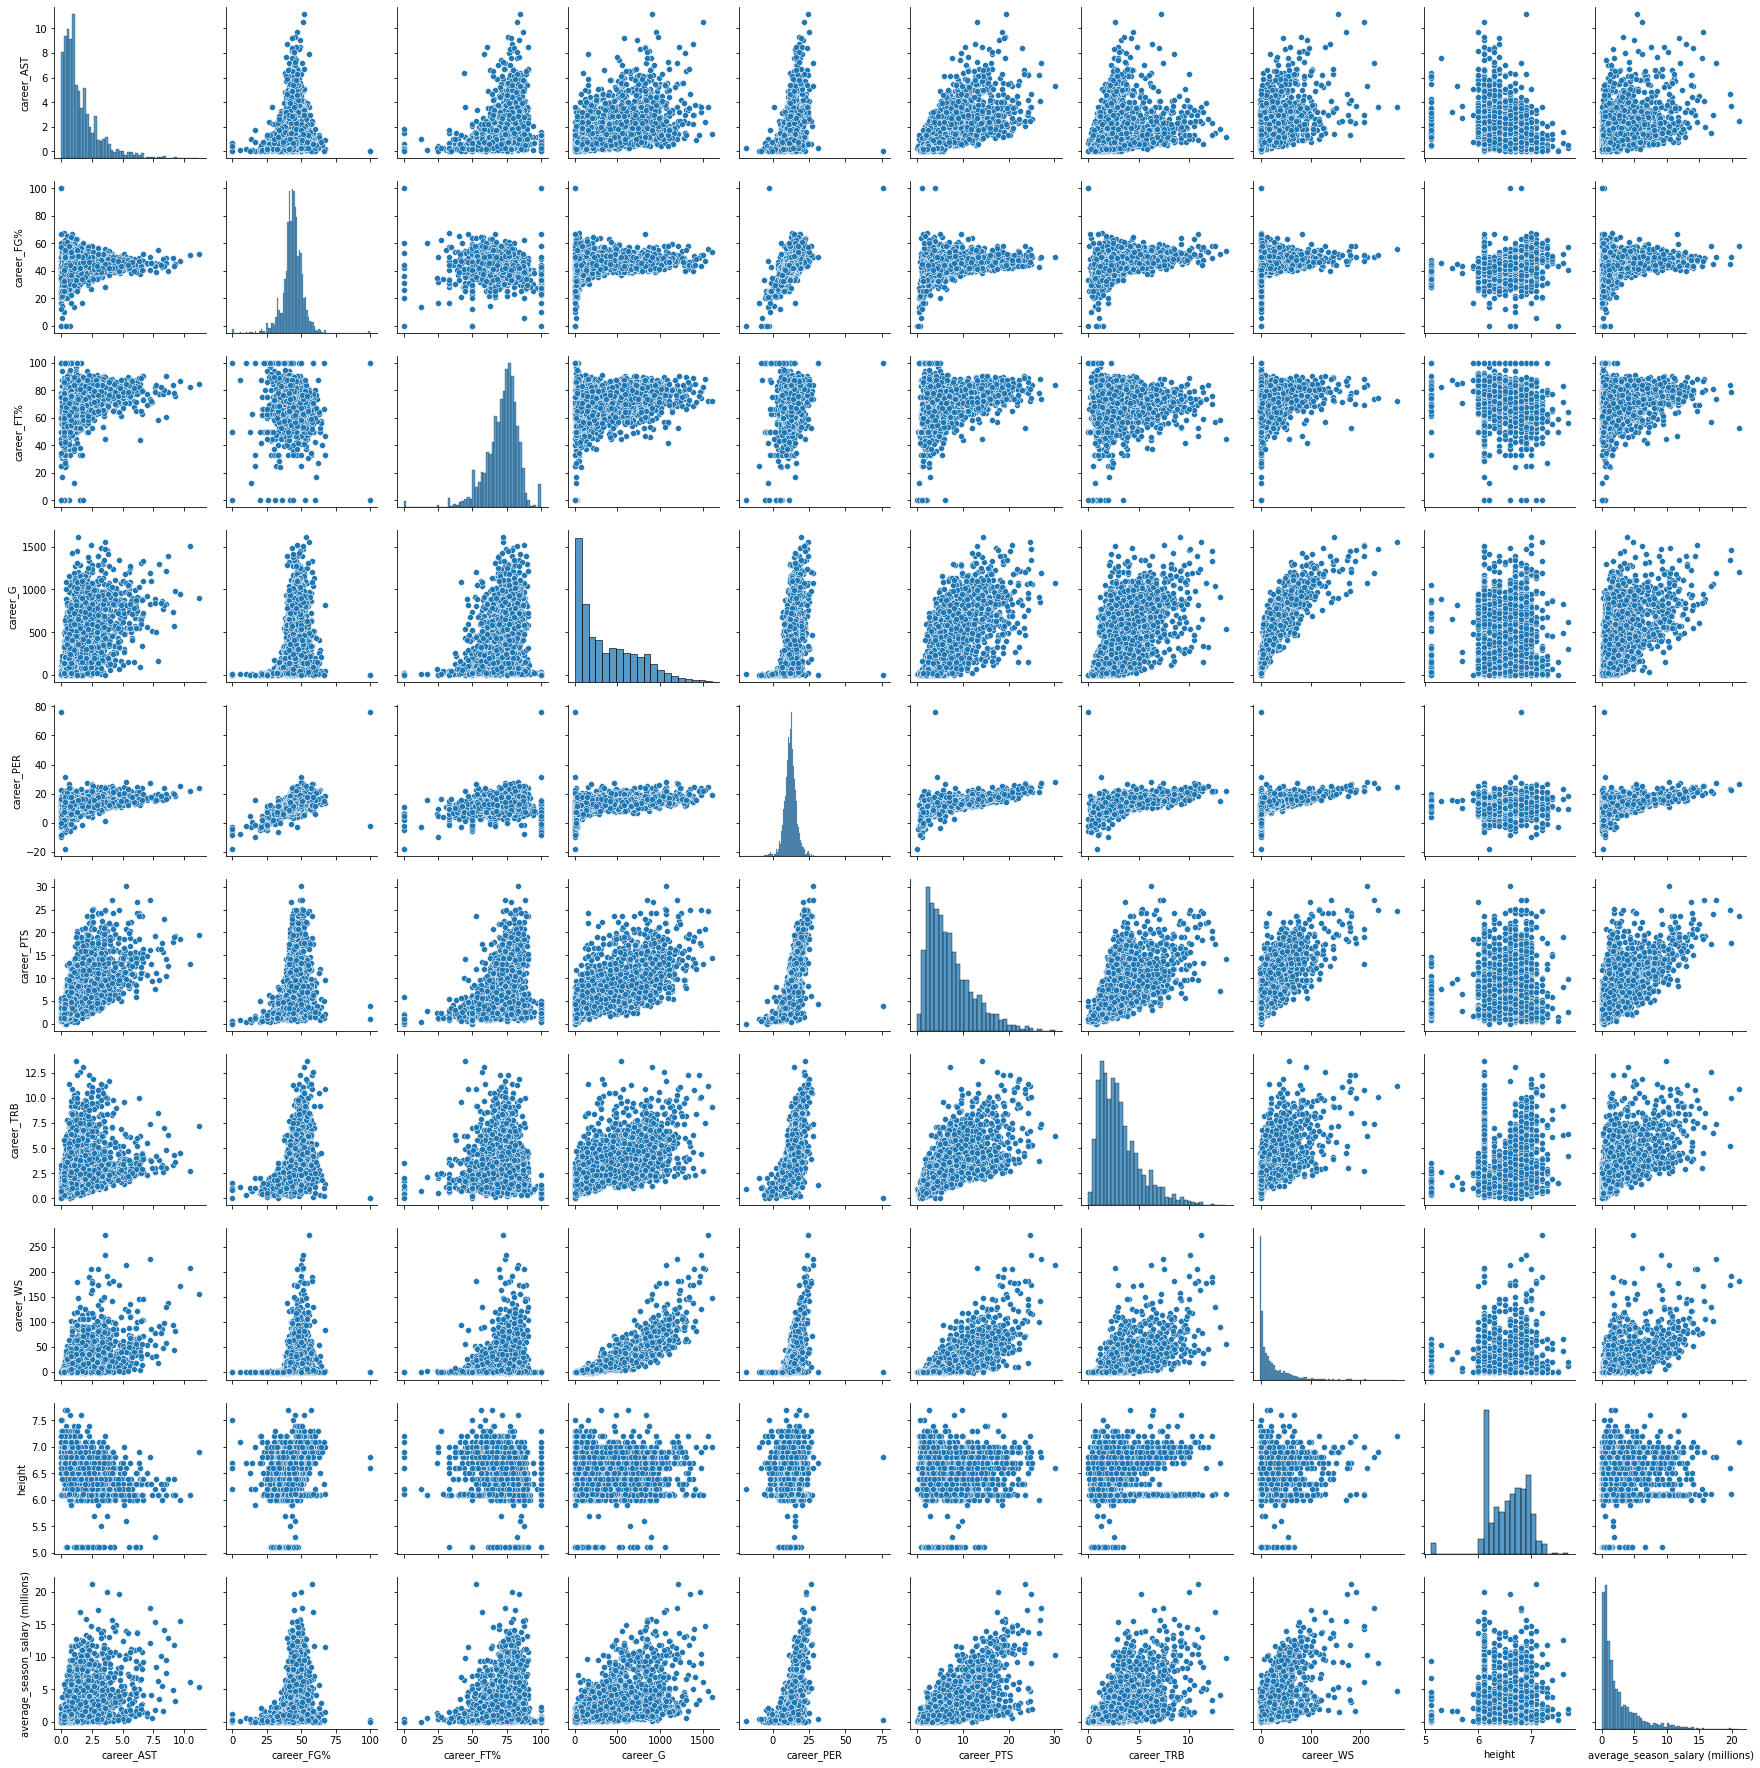

In [24]:
import seaborn as sns

sns.pairplot(stats[['career_AST', 'career_FG%', 'career_FT%', 'career_G', 'career_PER', 'career_PTS', 'career_TRB', 'career_WS', 'height', 'average_season_salary (millions)']])

### Regresión lineal:

Se supone que se pueden ajustar linealmente los salarios de los jugadores en función de sus estadísticas, en la forma:

$salario = \beta_0 + \beta_1career PER + \beta_2career PTS + \beta_3career AST + \beta_4careerFG + \beta_5careerG + \beta_6careerFT + \beta_7careerTRB + \beta_8careerWS + \beta_9height + \epsilon $

donde:

- $ \beta_0 $ es la intersección
- $ \beta_i $ con $i=1,..,9$ son los coeficientes del modelo
- $ \epsilon $ es el término de error


In [29]:
X = stats[['career_PER', 'career_PTS', 'career_AST', 'career_FG%', 'career_G', 'career_FT%', 'career_TRB', 'career_WS', 'height']]

y = stats['average_season_salary (millions)']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size = 0.25) 

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1754, 9)
(1754,)
(585, 9)
(585,)


El coeficiente $ R ^ 2 $ del ajuste lineal es:

In [30]:
import numpy as np
from sklearn.linear_model import LinearRegression

linear_regressor = LinearRegression()

fit = linear_regressor.fit(X_train, y_train)

fit.score(X_train, y_train)
print('R^2 =', fit.score(X_train, y_train))

R^2 = 0.5809736238270353


Una vez realizado el entrenamiento del modelo, es posible ver las predicciones y compararlas con los valores reales.

In [32]:
import numpy as np

def RegEvaluation(model, ytest, xtest, nameindex, yname,totaldt, predict=True):
    ypred = model.predict(xtest)
    xtest['predicted_salary'] = model.predict(xtest)
    dt = pd.merge(totaldt,xtest,how = 'right')
    xtest.drop(['predicted_salary'],axis=1,inplace=True)
    dt = dt[[nameindex, yname,'predicted_salary']]
    dt.sort_values(by = yname, ascending = False,inplace=True)
    if predict:
        return dt.head(20)

RegEvaluation(linear_regressor, y_test, X_test, 'name', 'average_season_salary (millions)',stats)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,name,average_season_salary (millions),predicted_salary
578,Carmelo Anthony,17.146472,9.432008
227,Chris Paul,15.537442,10.427418
410,Stephon Marbury,15.375208,6.710677
318,Marc Gasol,14.004596,7.356205
181,Gilbert Arenas,13.959346,6.478620
122,Allen Iverson,13.645548,9.014065
409,Joe Johnson,13.101847,6.500181
338,Zach Randolph,12.524933,8.312827
532,Keith Van Horn,12.221003,5.947342
411,Baron Davis,12.099379,6.171394


Como se puede apreciar, las predicciones no son demasiado acertadas, y eso está relacionado con el valor bajo de $ R ^ 2 $ que tiene el modelo de regresión lineal. 

Finalmente, los coeficientes $\beta_i$ del moodelo son:

In [33]:
# Print coefficients and intercept
print(linear_regressor.intercept_)
print(linear_regressor.coef_)

1.8154528309347642
[ 9.98761894e-02  1.46031719e-01 -2.13977213e-02 -6.88849741e-02
  1.81361473e-04 -9.97372436e-03  2.99482122e-01  3.29792720e-02
  8.52641093e-02]


In [44]:
from sklearn import metrics

y_pred = fit.predict(X_test)
print("MAE =", metrics.mean_absolute_error(y_test, y_pred))
print("MSE =",metrics.mean_squared_error(y_test, y_pred))

MAE = 1.4183773192344138
MSE = 4.463688681206321


### Otros regresores:

### AdaBoostRegressor 
(https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html):


Este regresor comienza ajustando un regresor en el dataset original y luego ajusta copias del regresor en el mismo dataset, pero donde los pesos de las instancias se ajustan de acuerdo al error de la predicción actual.

Este regresor mejora mucho la predicción de los salarios, como también el valor de $ R ^ 2 $, que en este caso es de 0.78. 

In [37]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=5),
                          n_estimators=500)
adaboost = reg.fit(X_train, y_train)

RegEvaluation(adaboost, y_test, X_test, 'name', 'average_season_salary (millions)',stats)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,name,average_season_salary (millions),predicted_salary
578,Carmelo Anthony,17.146472,6.493318
227,Chris Paul,15.537442,10.587929
410,Stephon Marbury,15.375208,8.265795
318,Marc Gasol,14.004596,9.379020
181,Gilbert Arenas,13.959346,9.272748
122,Allen Iverson,13.645548,6.679743
409,Joe Johnson,13.101847,8.472305
338,Zach Randolph,12.524933,8.377448
532,Keith Van Horn,12.221003,7.206848
411,Baron Davis,12.099379,6.745108


In [38]:
print('R^2 =', reg.score(X_train, y_train))

R^2 = 0.7791963098669743


Resulta interesante estudiar la importancia relativa de cada uno de los 9 coeficientes de la regresión. 

El regresor AdaBoost le asigna máxima imprtancia a la estadística *Win Shares* (aproximadamente 22%), que está relacionada a la cantidad de victorias que ha tenido un jugador a lo largo de su carrera. En este sentido, tiene mucho sentido que esta estadística sea de las más importantes en la determinación del salario. Es de esperarse que los jugadores más ganadores sean los que más salario perciben.
Luego, la segunda estadísitica más importante es *Player Efficiency Rating* (17%), la cual es una calificación "todo en uno" usada en basketball, que intenta combinar todas las contribuciones de un jugador en un solo número, por lo que también tiene sentido que sea muy influyente en su salario.
Por último, el resto de las estadísticas contribuyen, pero en menor medida, hasta llegar a la altura del jugador, *Height*, que casi no influye en la determinación del salario, por lo que se podría prescindir de ella.

[Text(0, 0.5, 'Variables'), Text(0.5, 0, 'Importance')]

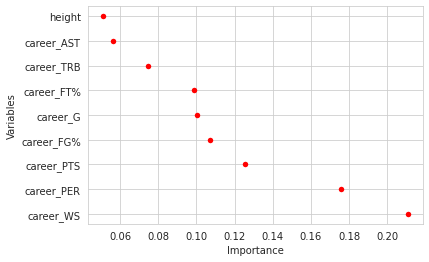

In [42]:
sns.set_style("whitegrid")
from tabulate import tabulate
values = sorted(zip(X_train.columns, reg.feature_importances_), key=lambda x: x[1] * -1)
imp = pd.DataFrame(values,columns = ["Name", "Score"])
imp.sort_values(by = 'Score',inplace = True)
sns.scatterplot(x='Score',y='Name',linewidth=0,
                data=imp,s = 30, color='red').set(
    xlabel='Importance', 
    ylabel='Variables')

In [43]:
y_pred = reg.predict(X_test)
print("MAE =", metrics.mean_absolute_error(y_test, y_pred))
print("MSE =",metrics.mean_squared_error(y_test, y_pred))

MAE = 1.5725361447899955
MSE = 4.289184860782535


### DecisionTreeRegressor 
(https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html):

Finalmente, este regresor otorga un valor de $R^2$ de 0.65, que es algo mejor que el regresor lineal, pero no tan bueno como AdaboostRegressor.

In [45]:
from sklearn import tree
clf = tree.DecisionTreeRegressor(max_depth=4, criterion="mse") 
dtree = clf.fit(X_train, y_train)

print('R^2 =', dtree.score(X_train, y_train))

R^2 = 0.6530681218805798


En cuanto a la importancia relativa de las estadísiticas, este regresor asigna una importancia máxima *Win Shares*, al igual que AdaBoost, pero le asigna un peso relativo mucho mayor, contribuyendo en más del 60% a la determinación del salario. 
En segundo lugar, también como con el regresor AdaBoost, se encuentra *Player Efficiency Rating* con una importancia relativa de aproximadamente 20%.
El resto de las características contribuyen en mucha menor medida que con respecto a AdaBoost, por lo que se esperaría que la eficacia predictiva no disminuya drásticamente si se las dejan de lado.

[Text(0, 0.5, 'Variables'), Text(0.5, 0, 'Importance')]

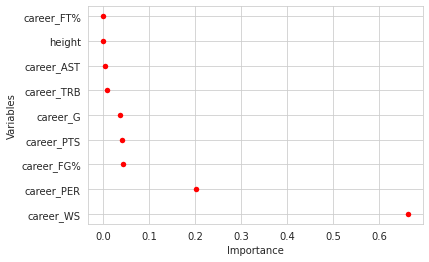

In [46]:
sns.set_style("whitegrid")
from tabulate import tabulate
values = sorted(zip(X_train.columns, clf.feature_importances_), key=lambda x: x[1] * -1)
imp = pd.DataFrame(values,columns = ["Name", "Score"])
imp.sort_values(by = 'Score',inplace = True)
sns.scatterplot(x='Score',y='Name',linewidth=0,
                data=imp,s = 30, color='red').set(
    xlabel='Importance', 
    ylabel='Variables')

In [47]:
y_pred = clf.predict(X_test)
print("MAE =", metrics.mean_absolute_error(y_test, y_pred))
print("MSE =",metrics.mean_squared_error(y_test, y_pred))

MAE = 1.390358023825466
MSE = 4.959112261835171


### Algunas consideraciones finales:

Dada la no completitud de los datos con los cuales se trabajó, se tomaron decisiones un tanto arbitrarias al momento de elegir los atributos con los cuales se realizaron las regresiones. Probablemente los regresores habrían arrojado mejores resultados (mejor $R^2$) si se hubiesen utilizado más características (u otras en lugar de las que se usaron).

En otros trabajos similares (https://www.kaggle.com/rikdifos/nba-players-salary-prediction, https://www.kaggle.com/aishjun/nba-salaries-prediction-in-2017-2018-season) el atributo más significativo al realizar la regresión, resultó ser la cantidad de minutos jugados (*Minutes Played*), pero esa característica no se encontraba disponible en el dataset. Intenté encontrar esos datos en Kaggle, para agregarlos al dataset, pero no tuve éxito.

Finalemente, quiero agradecer nuevamente a Agustin Copita, con quien trabajé en conjunto y tuvimos interesantes intercambios que nos permitieron llegar a estas conclusiones. En un momento pensamos en presentar un único TP pero como ya lo teníamos prácticamente terminados cada uno el suyo, decidimos presentarlos por separado.

